In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/content/drive/MyDrive/NNFL Assignments (Aug 2021)/Assignment 1/data_q11.xlsx')
cols = np.array(data.columns, ndmin=2)
data = data.to_numpy()
data = np.concatenate((cols,data), axis=0)

# normalizing
pp = np.amax(np.abs(data), axis=0)
data = data/pp

m = np.shape(data)[0] # no. of instances

In [3]:
rng = np.random.default_rng()
k = 20 #number of clusters
T = 300 #iters

label = rng.choice(range(k), m) # initial random labels
kmeans = np.zeros((k,np.shape(data)[1])) # mean matrix, jth row is mean vector for jth cluster

# kmeans clustering
for t in range(T):
  for cluster in range(k):
    cluster_points = data[label==cluster]
    if cluster_points.size==0:
      continue
    kmeans[cluster] = np.mean(cluster_points, axis=0)
  
  # updating labels
  for i in range(m):
    distances = []
    for j in range(k):
      diff = data[i] - kmeans[j]
      dist = np.sum(np.square(diff))
      distances.append(dist)
    label[i] = np.argmin(distances)

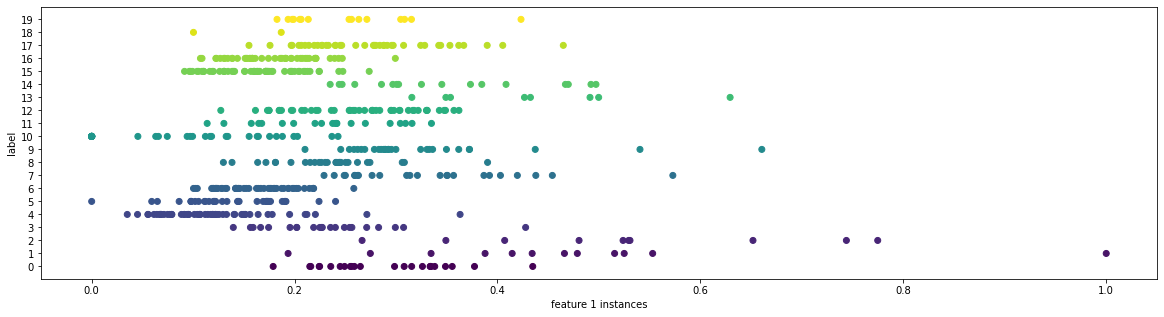

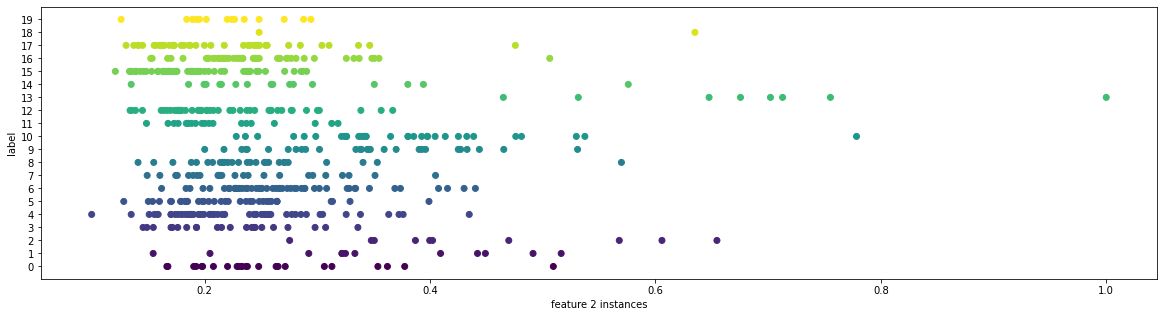

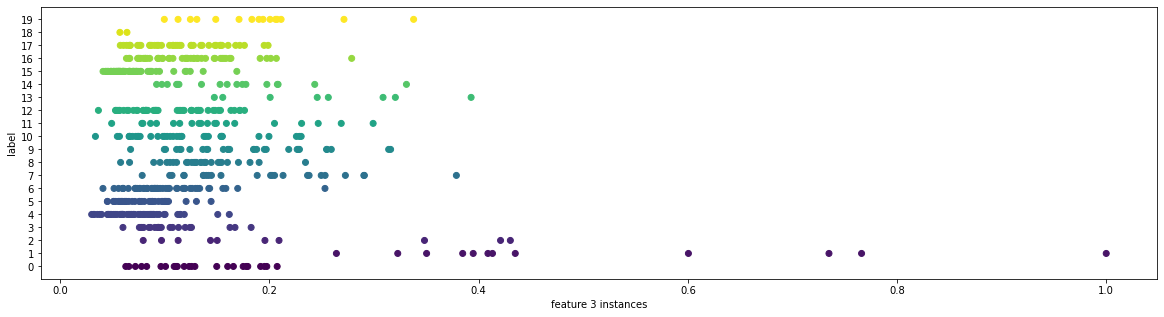

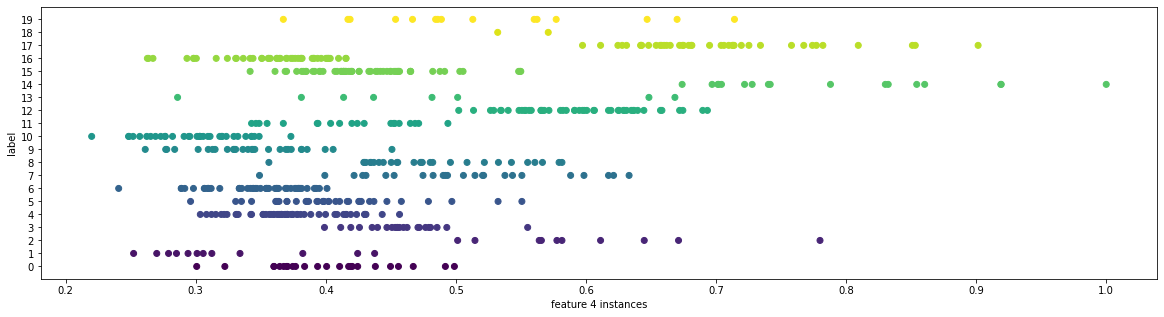

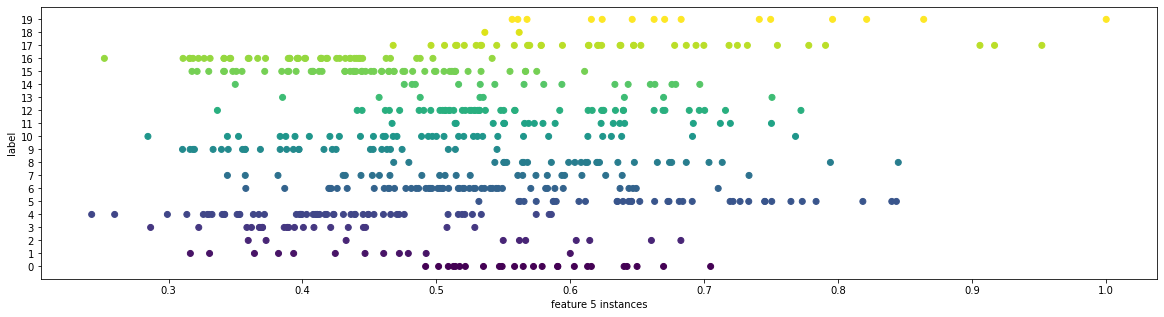

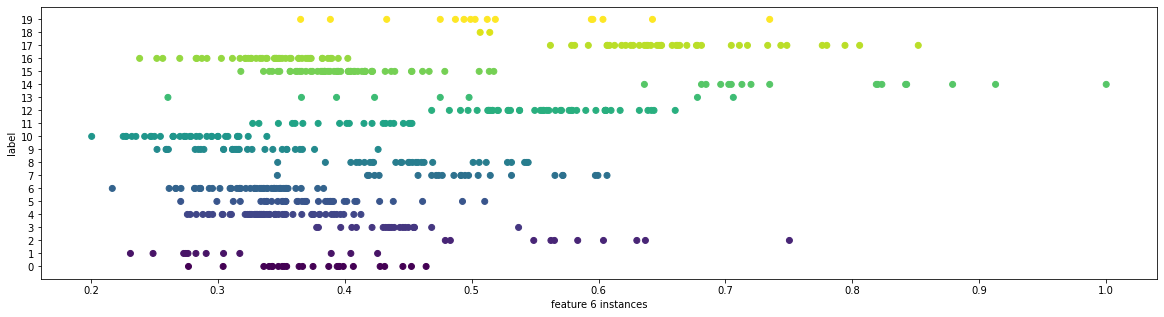

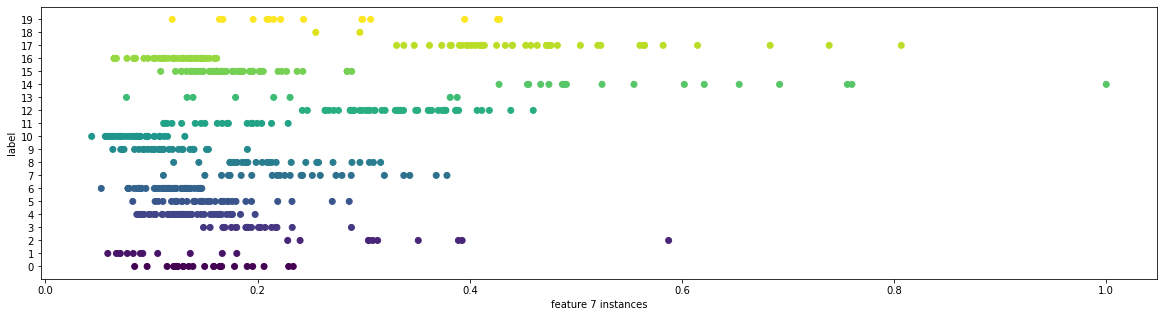

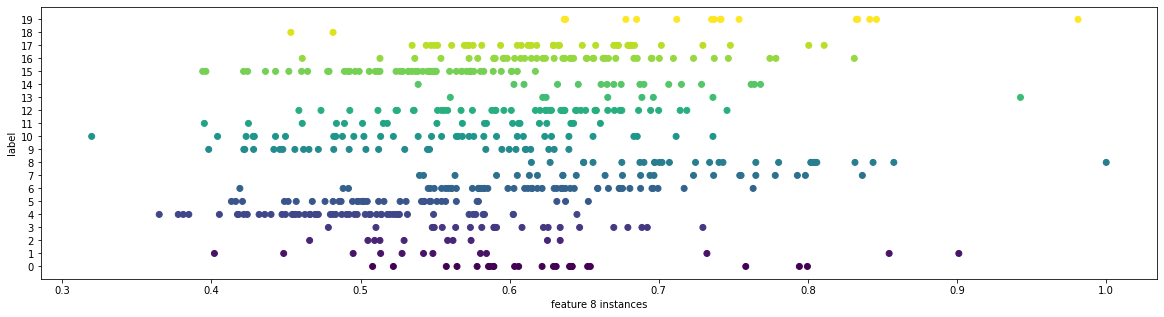

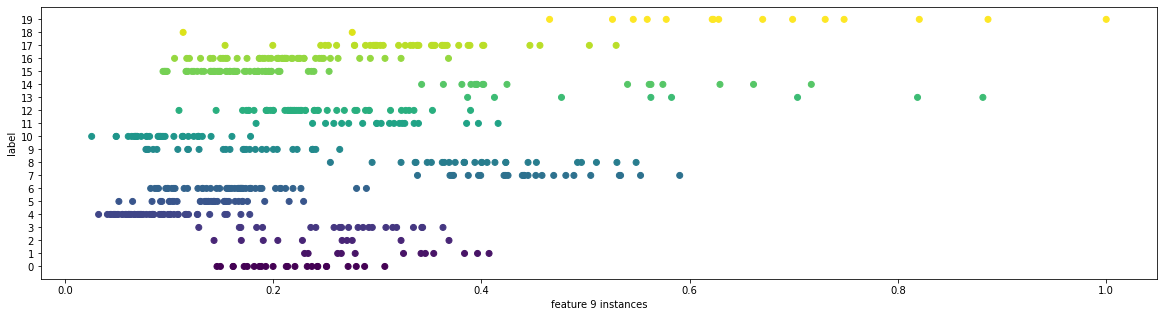

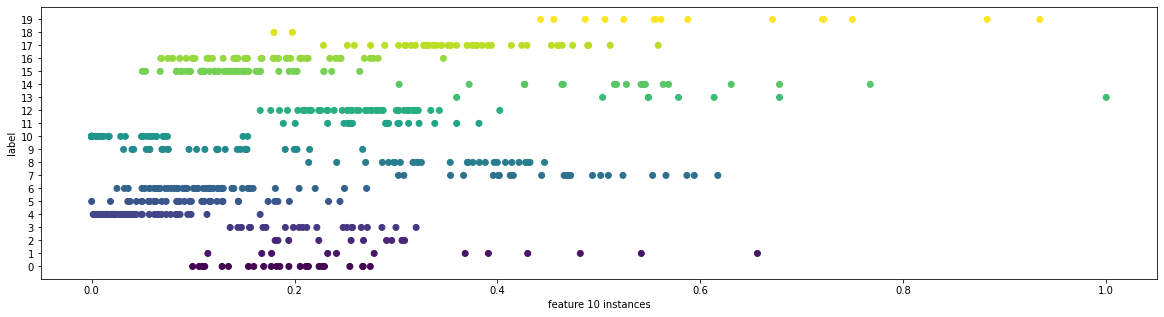

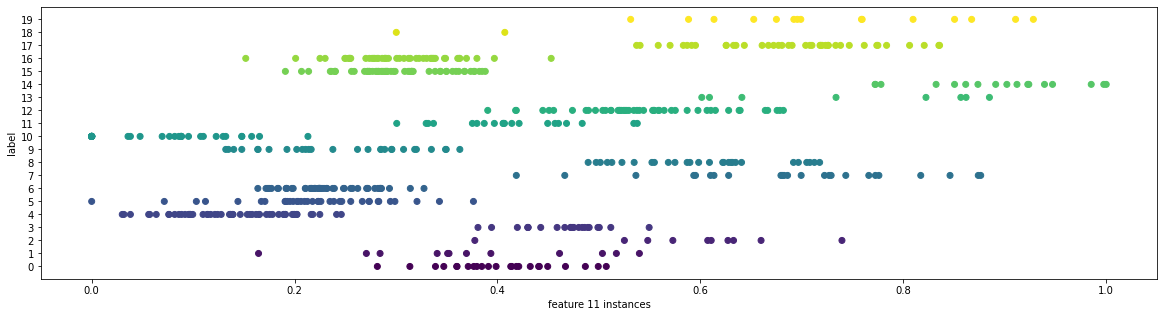

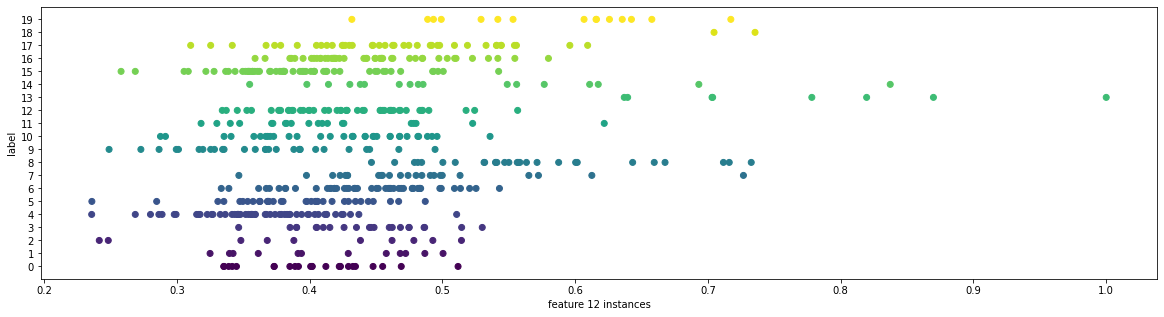

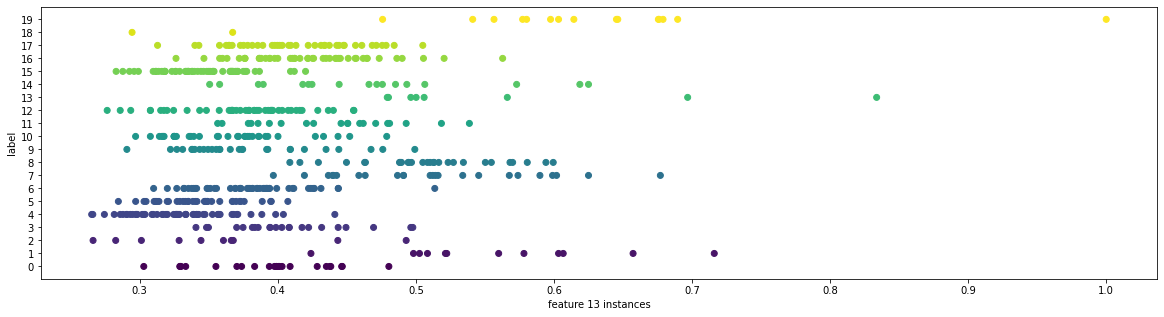

In [10]:
# plotting labels vs. individual features
for p in range(13):
  plt.figure(figsize=(20,5))
  plt.scatter(data[:,p],label, c=label)
  plt.xlabel('feature {} instances'.format(p+1))
  plt.ylabel('label')
  plt.yticks(range(20))
  plt.show()
  print()

# please find 13 plots below